In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/BikeLane_prediction/comptagesvelo2015.csv", index_col=[0])

In [3]:
df.columns

Index(['Unnamed: 1', 'Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 'Maisonneuve_2',
       'Maisonneuve_3', 'Notre-Dame', 'Parc', 'Parc U-Zelt Test', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine', 'Saint-Laurent U-Zelt Test',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger'],
      dtype='object')

In [4]:
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head(3)

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,Parc U-Zelt Test,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2015,58,12,4,17,33.0,49,21,16,16,NaN,...,NaN,58,91,24,3,NaN,17,78,21,6
02/01/2015,75,7,5,15,30.0,113,27,9,32,NaN,...,NaN,109,177,32,13,NaN,11,57,77,4
03/01/2015,79,7,3,7,30.0,107,36,12,18,NaN,...,NaN,71,131,33,5,NaN,14,174,40,5


In [6]:
df = df.dropna(axis=1)

In [7]:
df.head(3)

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,
01/01/2015,58,12,4,17,49,21,16,16,7,58,91,24,3,17,78,21,6
02/01/2015,75,7,5,15,113,27,9,32,11,109,177,32,13,11,57,77,4
03/01/2015,79,7,3,7,107,36,12,18,2,71,131,33,5,14,174,40,5


In [8]:
target_col = 'University'
all_cols = list(df.columns)
all_cols.remove(target_col)

df_X, df_y = df[all_cols].values, df[[target_col]].values

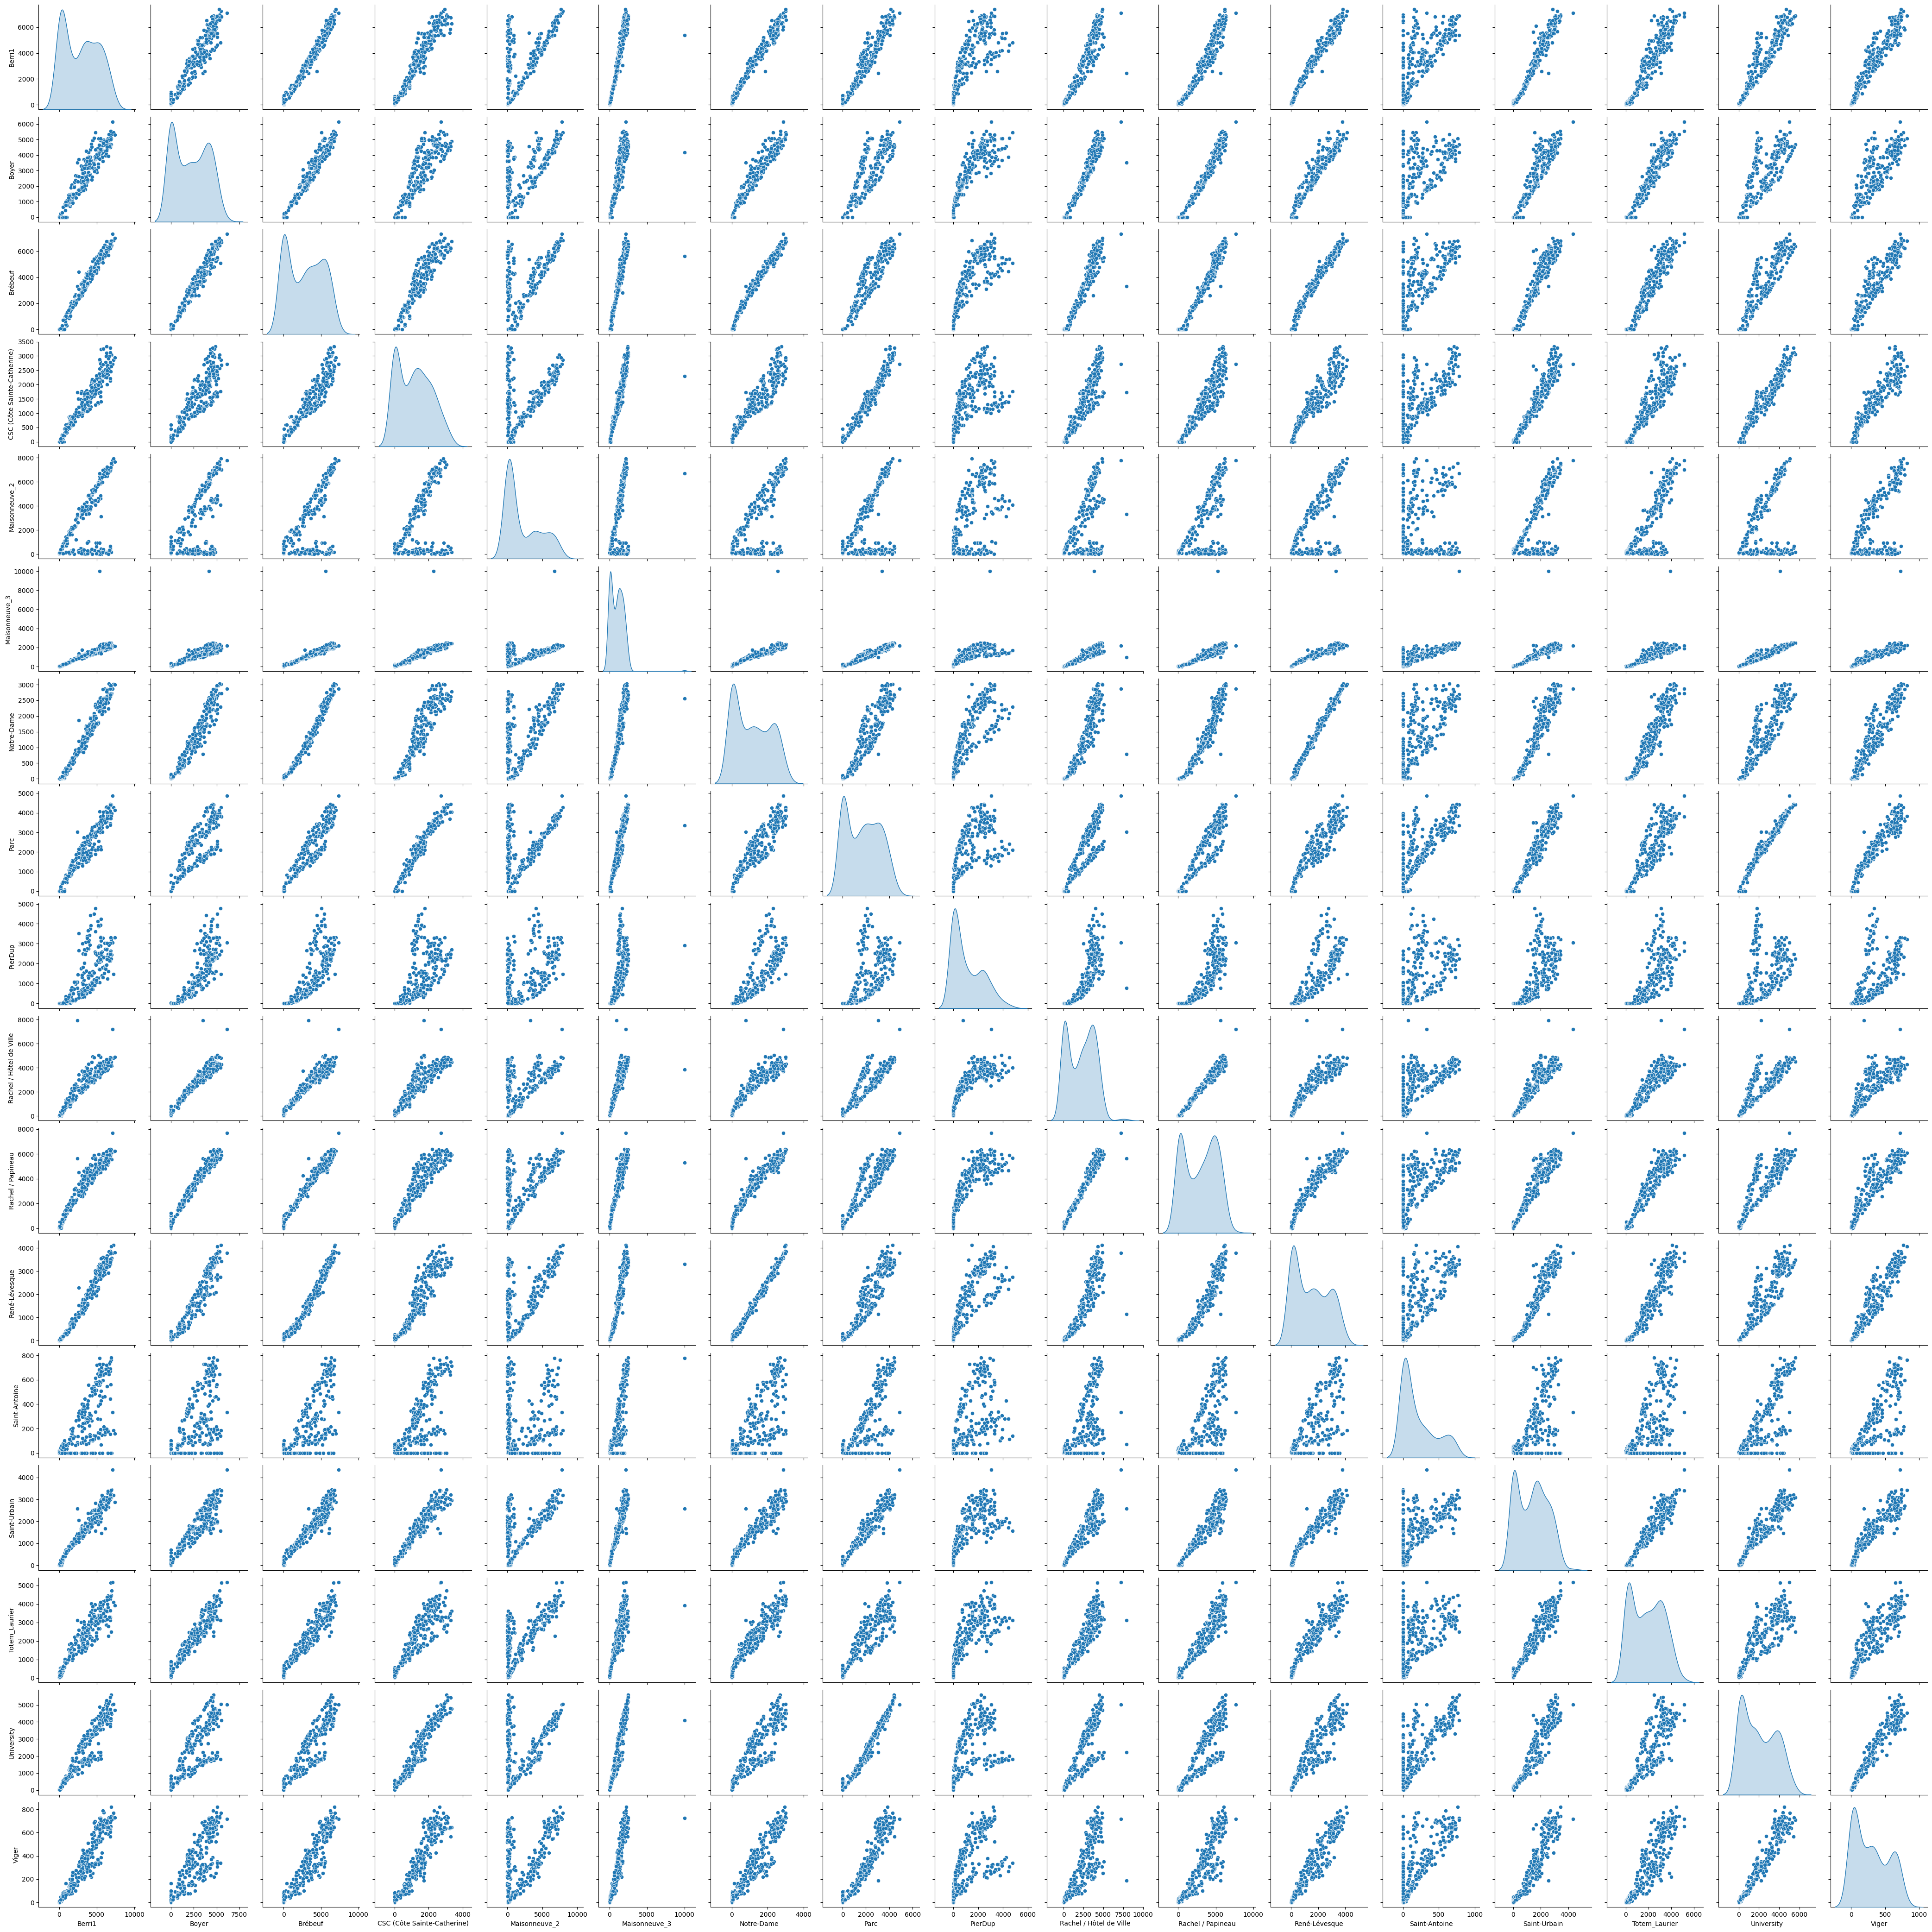

In [7]:
sns.pairplot(df, diag_kind='kde')

In [9]:
indexes = np.arange(len(df_X))
random.Random(4215).shuffle(indexes)

_90_perc = int(0.9 * len(indexes))

train_X, train_y = df_X[indexes[:_90_perc]], df_y[indexes[:_90_perc]]
test_X, test_y = df_X[indexes[_90_perc:]], df_y[indexes[_90_perc:]]

In [10]:
df_X_m, df_X_sdev = np.mean(train_X, axis=0, keepdims=True), np.std(train_X, axis=0, keepdims=True)
df_y_m, df_y_sdev = np.mean(train_y), np.std(train_y)

In [11]:
train_X = (train_X - df_X_m) / df_X_sdev
test_X = (test_X - df_X_m) / df_X_sdev

train_y = (train_y - df_y_m) / df_y_sdev
# test_y = (test_y - df_y_m) / df_y_sdev

In [12]:
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(287, 16) (287, 1)
(32, 16) (32, 1)


# Make the neural network

In [13]:
import tensorflow as tf

In [20]:
input_layer = tf.keras.Input(shape=(16, ))
h1 = tf.keras.layers.Dense(4, activation='relu')(input_layer)
out_layer = tf.keras.layers.Dense(1)(h1)

model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='Nadam', loss='mean_absolute_error')

In [22]:
%%time
history = model.fit(train_X, train_y, epochs=500, verbose=0, validation_split=0.05)

CPU times: total: 29.6 s
Wall time: 1min 8s


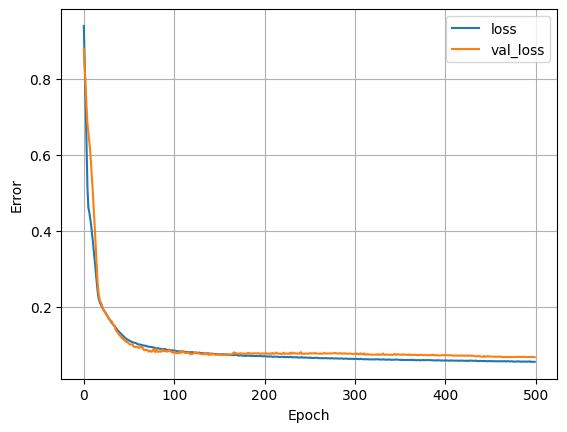

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.ylim([0, 0.8])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [24]:
predictions = model.predict(test_X)
predictions = (predictions * df_y_sdev) + df_y_m

1/1 [==============================] - 0s 186ms/step


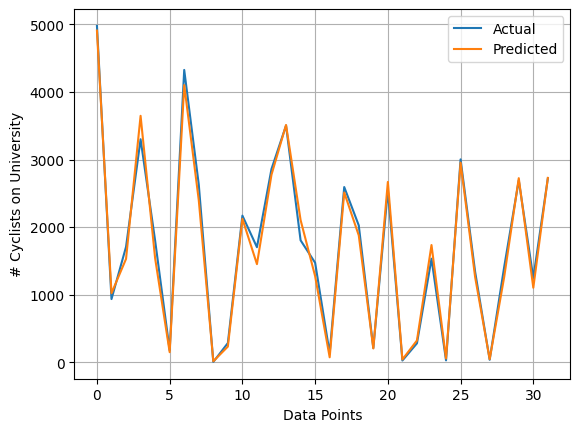

In [25]:
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('# Cyclists on University')
plt.legend()
plt.grid(True)